# Audio Effects Classification using Support-vector Machine

In [51]:
import numpy as np
import librosa
from pyAudioAnalysis import MidTermFeatures as aF
import os
import matplotlib.pyplot as plt
from IPython.display import Audio #todo remove


import sklearn.svm
import sklearn.preprocessing as scale
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from tqdm.notebook import tqdm

# Load Files and Create Lables

In [42]:
root = 'IDMT-SMT-AUDIO-EFFECTS/Gitarre monophon/Samples'
root = r'C:\Users\Luca Gobbato\Desktop\guitar'
classes = []
fileList = []
fileLable = []
number_file = []

sub_dirs = [x[0] for x in os.walk(root)]

for sub_dir in sub_dirs[1:]:
    className = os.path.basename(sub_dir) # return the last term of path
    classes.append(className)
    
    prog_bar = tqdm(desc='Loading audio samples')
    prog_bar.reset(total=len(os.listdir(sub_dir))) 
    
    file_list = [f for f in os.listdir(sub_dir) if f.endswith('.wav')]
    
    for f in file_list:
        fileList.append(os.path.join(sub_dir,f))
        fileLable.append(className)
        prog_bar.update()
    prog_bar.refresh();
    
    number_file.append(len(os.listdir(sub_dir)))

print(number_file)    
print(classes)
len(fileList)

Loading audio samples: 0it [00:00, ?it/s]

Loading audio samples: 0it [00:00, ?it/s]

Loading audio samples: 0it [00:00, ?it/s]

[1872, 624, 1872]
['Distortion', 'NoFX', 'Tremolo']


4368

# Compute Features

In [85]:
n_mfcc = 40 # 13
samples = len(fileList)
mfcc_ft = np.zeros((samples, n_mfcc))
zcr_ft = np.zeros((samples,173))
sc_ft = np.zeros((samples,173))

prog_bar = tqdm(desc='Loading audio samples')
prog_bar.reset(total=samples) 

for index, f in enumerate(fileList): 
    audio, fs = librosa.load(f, sr=None)
    
    mfcc = librosa.feature.mfcc(y=audio,sr=fs,n_fft=2048,hop_length=512,window='hamming',n_mels=40,fmin=80,fmax=8000,
                                n_mfcc=n_mfcc,norm='ortho')
    mfcc_ft[index, :] = np.mean(mfcc, axis=1) 
    
    zcr = librosa.feature.zero_crossing_rate(y=audio, frame_length=2048, hop_length=512, center=True)
    zcr_ft[index, :] = zcr
    
    sc = librosa.feature.spectral_centroid(y=audio, sr=fs, n_fft=2048, hop_length=512, freq=None)
    sc_ft[index, :] = sc
    
    prog_bar.update()
prog_bar.refresh();

features = np.concatenate((mfcc_ft,zcr_ft,sc_ft), axis=1)
# print(spectral_ft.shape)
# print(spectral_ft)
print(features.shape)
print(features)

Loading audio samples: 0it [00:00, ?it/s]

(4368, 386)
[[-1.59179520e+02  7.75590134e+01 -9.65071774e+00 ...  7.43312820e+02
   7.98321893e+02  9.17105007e+02]
 [-1.26484634e+02  6.13557243e+01  5.89820337e+00 ...  1.40749636e+03
   1.42656645e+03  1.47902489e+03]
 [-2.14657928e+02  9.29478226e+01  1.10357656e+01 ...  5.35829581e+02
   6.31460676e+02  8.48407121e+02]
 ...
 [-3.07947937e+02  2.53765774e+01 -6.92750168e+00 ...  3.91026670e+03
   4.85405399e+03  5.61210797e+03]
 [-3.18150970e+02  2.44234123e+01 -6.58422899e+00 ...  4.29383067e+03
   5.32854598e+03  5.73459193e+03]
 [-3.12455200e+02  2.42668915e+01 -6.77647877e+00 ...  5.70151351e+03
   6.88113195e+03  6.30526241e+03]]


In [2]:
# def multiple_directory_feature_extraction(path_list, mid_window, mid_step,
#                                           short_window, short_step,
#                                           compute_beat=False):
#     """
#     Same as dirWavFeatureExtraction, but instead of a single dir it
#     takes a list of paths as input and returns a list of feature matrices.
#     EXAMPLE:
#     [features, classNames] =
#            a.dirsWavFeatureExtraction(['audioData/classSegmentsRec/noise',
#                                        'audioData/classSegmentsRec/speech',
#                                        'audioData/classSegmentsRec/brush-teeth',
#                                        'audioData/classSegmentsRec/shower'], 1, 
#                                        1, 0.02, 0.02);
#     It can be used during the training process of a classification model ,
#     in order to get feature matrices from various audio classes (each stored in
#     a separate path)
#     """
#     return features, class_names, file_names

In [46]:
root = r'C:\Users\Luca Gobbato\Desktop\guitar'
path_list = [root + '\Tremolo']
path_list.append(r'C:\Users\Luca Gobbato\Desktop\guitar\NoFx')
path_list.append(root + '\Distortion')

# path_list = [r'C:\Users\Luca Gobbato\Desktop\guitar']

mid_window, mid_step,short_window, short_step = 1, 1, 0.02, 0.02
# pyAudioAnalysis.MidTermFeatures.
features_audio, class_names, file_names = [], [], []
features_audio, class_names, file_names = aF.multiple_directory_feature_extraction(path_list, mid_window, mid_step,
                                          short_window, short_step,
                                          compute_beat=False)

Analyzing file 1 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G61-40100-3341-33697.wav
Analyzing file 2 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G61-40100-3342-34321.wav
Analyzing file 3 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G61-40100-3343-34945.wav
Analyzing file 4 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G61-41101-3341-33698.wav
Analyzing file 5 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G61-41101-3342-34322.wav
Analyzing file 6 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G61-41101-3343-34946.wav
Analyzing file 7 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G61-42102-3341-33699.wav
Analyzing file 8 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G61-42102-3342-34323.wav
Analyzing file 9 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G61-42102-3343-34947.wav
Analyzing file 10 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G61-43103-3341-33700.wav
Analyzing file 11 of 1872: C:\Users\Luc

Analyzing file 86 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G61-55210-3342-34344.wav
Analyzing file 87 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G61-55210-3343-34968.wav
Analyzing file 88 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G61-55305-3341-33728.wav
Analyzing file 89 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G61-55305-3342-34352.wav
Analyzing file 90 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G61-55305-3343-34976.wav
Analyzing file 91 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G61-55400-3341-33736.wav
Analyzing file 92 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G61-55400-3342-34360.wav
Analyzing file 93 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G61-55400-3343-34984.wav
Analyzing file 94 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G61-56211-3341-33721.wav
Analyzing file 95 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G61-56211-3342-34345.wav
Analyzing file 96 of 1872: C:\

Analyzing file 170 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G61-65410-3342-34370.wav
Analyzing file 171 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G61-65410-3343-34994.wav
Analyzing file 172 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G61-65506-3341-33755.wav
Analyzing file 173 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G61-65506-3342-34379.wav
Analyzing file 174 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G61-65506-3343-35003.wav
Analyzing file 175 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G61-65601-3341-33763.wav
Analyzing file 176 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G61-65601-3342-34387.wav
Analyzing file 177 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G61-65601-3343-35011.wav
Analyzing file 178 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G61-66411-3341-33747.wav
Analyzing file 179 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G61-66411-3342-34371.wav
Analyzing file 180 o

Analyzing file 255 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G63-45200-3343-35036.wav
Analyzing file 256 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G63-46106-3341-33781.wav
Analyzing file 257 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G63-46106-3342-34405.wav
Analyzing file 258 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G63-46106-3343-35029.wav
Analyzing file 259 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G63-46201-3341-33789.wav
Analyzing file 260 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G63-46201-3342-34413.wav
Analyzing file 261 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G63-46201-3343-35037.wav
Analyzing file 262 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G63-47107-3341-33782.wav
Analyzing file 263 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G63-47107-3342-34406.wav
Analyzing file 264 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G63-47107-3343-35030.wav
Analyzing file 265 o

Analyzing file 339 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G63-57212-3343-35048.wav
Analyzing file 340 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G63-57307-3341-33808.wav
Analyzing file 341 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G63-57307-3342-34432.wav
Analyzing file 342 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G63-57307-3343-35056.wav
Analyzing file 343 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G63-57402-3341-33816.wav
Analyzing file 344 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G63-57402-3342-34440.wav
Analyzing file 345 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G63-57402-3343-35064.wav
Analyzing file 346 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G63-58308-3341-33809.wav
Analyzing file 347 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G63-58308-3342-34433.wav
Analyzing file 348 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G63-58308-3343-35057.wav
Analyzing file 349 o

Analyzing file 424 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G63-67508-3341-33835.wav
Analyzing file 425 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G63-67508-3342-34459.wav
Analyzing file 426 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G63-67508-3343-35083.wav
Analyzing file 427 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G63-67603-3341-33843.wav
Analyzing file 428 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G63-67603-3342-34467.wav
Analyzing file 429 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G63-67603-3343-35091.wav
Analyzing file 430 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G63-68509-3341-33836.wav
Analyzing file 431 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G63-68509-3342-34460.wav
Analyzing file 432 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G63-68509-3343-35084.wav
Analyzing file 433 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G63-68604-3341-33844.wav
Analyzing file 434 o

Analyzing file 509 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G71-49109-3342-34486.wav
Analyzing file 510 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G71-49109-3343-35110.wav
Analyzing file 511 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G71-49204-3341-33870.wav
Analyzing file 512 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G71-49204-3342-34494.wav
Analyzing file 513 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G71-49204-3343-35118.wav
Analyzing file 514 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G71-50110-3341-33863.wav
Analyzing file 515 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G71-50110-3342-34487.wav
Analyzing file 516 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G71-50110-3343-35111.wav
Analyzing file 517 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G71-50205-3341-33871.wav
Analyzing file 518 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G71-50205-3342-34495.wav
Analyzing file 519 o

Analyzing file 677 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G71-70511-3342-34540.wav
Analyzing file 678 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G71-70511-3343-35164.wav
Analyzing file 679 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G71-70606-3341-33924.wav
Analyzing file 680 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G71-70606-3342-34548.wav
Analyzing file 681 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G71-70606-3343-35172.wav
Analyzing file 682 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G71-71512-3341-33917.wav
Analyzing file 683 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G71-71512-3342-34541.wav
Analyzing file 684 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G71-71512-3343-35165.wav
Analyzing file 685 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G71-71607-3341-33925.wav
Analyzing file 686 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G71-71607-3342-34549.wav
Analyzing file 687 o

Analyzing file 761 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G73-51206-3342-34574.wav
Analyzing file 762 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G73-51206-3343-35198.wav
Analyzing file 763 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G73-51301-3341-33958.wav
Analyzing file 764 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G73-51301-3342-34582.wav
Analyzing file 765 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G73-51301-3343-35206.wav
Analyzing file 766 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G73-52112-3341-33943.wav
Analyzing file 767 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G73-52112-3342-34567.wav
Analyzing file 768 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G73-52112-3343-35191.wav
Analyzing file 769 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G73-52207-3341-33951.wav
Analyzing file 770 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G73-52207-3342-34575.wav
Analyzing file 771 o

Analyzing file 845 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G73-61502-3342-34609.wav
Analyzing file 846 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G73-61502-3343-35233.wav
Analyzing file 847 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G73-62312-3341-33969.wav
Analyzing file 848 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G73-62312-3342-34593.wav
Analyzing file 849 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G73-62312-3343-35217.wav
Analyzing file 850 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G73-62407-3341-33977.wav
Analyzing file 851 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G73-62407-3342-34601.wav
Analyzing file 852 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G73-62407-3343-35225.wav
Analyzing file 853 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G73-62503-3341-33986.wav
Analyzing file 854 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G73-62503-3342-34610.wav
Analyzing file 855 o

Analyzing file 930 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G73-74610-3343-35254.wav
Analyzing file 931 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G73-75611-3341-34007.wav
Analyzing file 932 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G73-75611-3342-34631.wav
Analyzing file 933 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G73-75611-3343-35255.wav
Analyzing file 934 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G73-76612-3341-34008.wav
Analyzing file 935 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G73-76612-3342-34632.wav
Analyzing file 936 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G73-76612-3343-35256.wav
Analyzing file 937 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G81-40100-3341-34009.wav
Analyzing file 938 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G81-40100-3342-34633.wav
Analyzing file 939 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G81-40100-3343-35257.wav
Analyzing file 940 o

Analyzing file 1014 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G81-53303-3343-35286.wav
Analyzing file 1015 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G81-54209-3341-34031.wav
Analyzing file 1016 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G81-54209-3342-34655.wav
Analyzing file 1017 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G81-54209-3343-35279.wav
Analyzing file 1018 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G81-54304-3341-34039.wav
Analyzing file 1019 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G81-54304-3342-34663.wav
Analyzing file 1020 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G81-54304-3343-35287.wav
Analyzing file 1021 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G81-55210-3341-34032.wav
Analyzing file 1022 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G81-55210-3342-34656.wav
Analyzing file 1023 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G81-55210-3343-35280.wav
Analyzing 

Analyzing file 1098 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G81-64409-3343-35305.wav
Analyzing file 1099 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G81-64505-3341-34066.wav
Analyzing file 1100 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G81-64505-3342-34690.wav
Analyzing file 1101 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G81-64505-3343-35314.wav
Analyzing file 1102 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G81-64600-3341-34074.wav
Analyzing file 1103 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G81-64600-3342-34698.wav
Analyzing file 1104 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G81-64600-3343-35322.wav
Analyzing file 1105 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G81-65410-3341-34058.wav
Analyzing file 1106 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G81-65410-3342-34682.wav
Analyzing file 1107 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G81-65410-3343-35306.wav
Analyzing 

Analyzing file 1181 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G83-43103-3342-34714.wav
Analyzing file 1182 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G83-43103-3343-35338.wav
Analyzing file 1183 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G83-44104-3341-34091.wav
Analyzing file 1184 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G83-44104-3342-34715.wav
Analyzing file 1185 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G83-44104-3343-35339.wav
Analyzing file 1186 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G83-45105-3341-34092.wav
Analyzing file 1187 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G83-45105-3342-34716.wav
Analyzing file 1188 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G83-45105-3343-35340.wav
Analyzing file 1189 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G83-45200-3341-34100.wav
Analyzing file 1190 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G83-45200-3342-34724.wav
Analyzing 

Analyzing file 1265 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G83-56211-3342-34735.wav
Analyzing file 1266 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G83-56211-3343-35359.wav
Analyzing file 1267 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G83-56306-3341-34119.wav
Analyzing file 1268 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G83-56306-3342-34743.wav
Analyzing file 1269 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G83-56306-3343-35367.wav
Analyzing file 1270 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G83-56401-3341-34127.wav
Analyzing file 1271 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G83-56401-3342-34751.wav
Analyzing file 1272 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G83-56401-3343-35375.wav
Analyzing file 1273 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G83-57212-3341-34112.wav
Analyzing file 1274 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G83-57212-3342-34736.wav
Analyzing 

Analyzing file 1349 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G83-66411-3342-34761.wav
Analyzing file 1350 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G83-66411-3343-35385.wav
Analyzing file 1351 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G83-66507-3341-34146.wav
Analyzing file 1352 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G83-66507-3342-34770.wav
Analyzing file 1353 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G83-66507-3343-35394.wav
Analyzing file 1354 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G83-66602-3341-34154.wav
Analyzing file 1355 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G83-66602-3342-34778.wav
Analyzing file 1356 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G83-66602-3343-35402.wav
Analyzing file 1357 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G83-67412-3341-34138.wav
Analyzing file 1358 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G83-67412-3342-34762.wav
Analyzing 

Analyzing file 1433 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G91-47107-3342-34796.wav
Analyzing file 1434 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G91-47107-3343-35420.wav
Analyzing file 1435 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G91-47202-3341-34180.wav
Analyzing file 1436 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G91-47202-3342-34804.wav
Analyzing file 1437 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G91-47202-3343-35428.wav
Analyzing file 1438 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G91-48108-3341-34173.wav
Analyzing file 1439 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G91-48108-3342-34797.wav
Analyzing file 1440 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G91-48108-3343-35421.wav
Analyzing file 1441 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G91-48203-3341-34181.wav
Analyzing file 1442 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G91-48203-3342-34805.wav
Analyzing 

Analyzing file 1517 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G91-58308-3342-34823.wav
Analyzing file 1518 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G91-58308-3343-35447.wav
Analyzing file 1519 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G91-58403-3341-34207.wav
Analyzing file 1520 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G91-58403-3342-34831.wav
Analyzing file 1521 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G91-58403-3343-35455.wav
Analyzing file 1522 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G91-59309-3341-34200.wav
Analyzing file 1523 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G91-59309-3342-34824.wav
Analyzing file 1524 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G91-59309-3343-35448.wav
Analyzing file 1525 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G91-59404-3341-34208.wav
Analyzing file 1526 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G91-59404-3342-34832.wav
Analyzing 

Analyzing file 1601 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G91-68509-3342-34850.wav
Analyzing file 1602 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G91-68509-3343-35474.wav
Analyzing file 1603 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G91-68604-3341-34234.wav
Analyzing file 1604 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G91-68604-3342-34858.wav
Analyzing file 1605 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G91-68604-3343-35482.wav
Analyzing file 1606 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G91-69510-3341-34227.wav
Analyzing file 1607 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G91-69510-3342-34851.wav
Analyzing file 1608 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G91-69510-3343-35475.wav
Analyzing file 1609 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G91-69605-3341-34235.wav
Analyzing file 1610 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G91-69605-3342-34859.wav
Analyzing 

Analyzing file 1685 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G93-50110-3342-34877.wav
Analyzing file 1686 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G93-50110-3343-35501.wav
Analyzing file 1687 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G93-50205-3341-34261.wav
Analyzing file 1688 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G93-50205-3342-34885.wav
Analyzing file 1689 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G93-50205-3343-35509.wav
Analyzing file 1690 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G93-50300-3341-34269.wav
Analyzing file 1691 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G93-50300-3342-34893.wav
Analyzing file 1692 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G93-50300-3343-35517.wav
Analyzing file 1693 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G93-51111-3341-34254.wav
Analyzing file 1694 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G93-51111-3342-34878.wav
Analyzing 

Analyzing file 1769 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G93-60405-3342-34911.wav
Analyzing file 1770 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G93-60405-3343-35535.wav
Analyzing file 1771 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G93-60501-3341-34296.wav
Analyzing file 1772 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G93-60501-3342-34920.wav
Analyzing file 1773 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G93-60501-3343-35544.wav
Analyzing file 1774 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G93-61311-3341-34280.wav
Analyzing file 1775 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G93-61311-3342-34904.wav
Analyzing file 1776 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G93-61311-3343-35528.wav
Analyzing file 1777 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G93-61406-3341-34288.wav
Analyzing file 1778 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G93-61406-3342-34912.wav
Analyzing 

C:\Users\Luca Gobbato\anaconda3\envs\CMLS\lib\site-packages\pyAudioAnalysis\ShortTermFeatures.py:62: RuntimeWarning: invalid value encountered in true_divide
  Xt = Xt / Xt.max()
C:\Users\Luca Gobbato\anaconda3\envs\CMLS\lib\site-packages\pyAudioAnalysis\ShortTermFeatures.py:297: RuntimeWarning: invalid value encountered in true_divide
  final_matrix /= spec.sum()


Analyzing file 1809 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G93-65410-3343-35540.wav
Analyzing file 1810 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G93-65506-3341-34301.wav
Analyzing file 1811 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G93-65506-3342-34925.wav
Analyzing file 1812 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G93-65506-3343-35549.wav
Analyzing file 1813 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G93-65601-3341-34309.wav
Analyzing file 1814 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G93-65601-3342-34933.wav
Analyzing file 1815 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G93-65601-3343-35557.wav
Analyzing file 1816 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G93-66411-3341-34293.wav
Analyzing file 1817 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G93-66411-3342-34917.wav
Analyzing file 1818 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Tremolo\G93-66411-3343-35541.wav
Analyzing 

Analyzing file 22 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G61-52112-1111-20605.wav
Analyzing file 23 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G61-52207-1111-20613.wav
Analyzing file 24 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G61-52302-1111-20621.wav
Analyzing file 25 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G61-53208-1111-20614.wav
Analyzing file 26 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G61-53303-1111-20622.wav
Analyzing file 27 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G61-54209-1111-20615.wav
Analyzing file 28 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G61-54304-1111-20623.wav
Analyzing file 29 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G61-55210-1111-20616.wav
Analyzing file 30 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G61-55305-1111-20624.wav
Analyzing file 31 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G61-55400-1111-20632.wav
Analyzing file 32 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G6

Analyzing file 110 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G63-56211-1111-20695.wav
Analyzing file 111 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G63-56306-1111-20703.wav
Analyzing file 112 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G63-56401-1111-20711.wav
Analyzing file 113 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G63-57212-1111-20696.wav
Analyzing file 114 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G63-57307-1111-20704.wav
Analyzing file 115 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G63-57402-1111-20712.wav
Analyzing file 116 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G63-58308-1111-20705.wav
Analyzing file 117 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G63-58403-1111-20713.wav
Analyzing file 118 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G63-59309-1111-20706.wav
Analyzing file 119 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G63-59404-1111-20714.wav
Analyzing file 120 of 624: C:\Users\Luca Gobbato\Desktop\gui

Analyzing file 198 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G71-59500-1111-20801.wav
Analyzing file 199 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G71-60310-1111-20785.wav
Analyzing file 200 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G71-60405-1111-20793.wav
Analyzing file 201 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G71-60501-1111-20802.wav
Analyzing file 202 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G71-61311-1111-20786.wav
Analyzing file 203 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G71-61406-1111-20794.wav
Analyzing file 204 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G71-61502-1111-20803.wav
Analyzing file 205 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G71-62312-1111-20787.wav
Analyzing file 206 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G71-62407-1111-20795.wav
Analyzing file 207 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G71-62503-1111-20804.wav
Analyzing file 208 of 624: C:\Users\Luca Gobbato\Desktop\gui

Analyzing file 286 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G73-63408-1111-20874.wav
Analyzing file 287 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G73-63504-1111-20883.wav
Analyzing file 288 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G73-64409-1111-20875.wav
Analyzing file 289 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G73-64505-1111-20884.wav
Analyzing file 290 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G73-64600-1111-20892.wav
Analyzing file 291 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G73-65410-1111-20876.wav
Analyzing file 292 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G73-65506-1111-20885.wav
Analyzing file 293 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G73-65601-1111-20893.wav
Analyzing file 294 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G73-66411-1111-20877.wav
Analyzing file 295 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G73-66507-1111-20886.wav
Analyzing file 296 of 624: C:\Users\Luca Gobbato\Desktop\gui

Analyzing file 374 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G81-66602-1111-20972.wav
Analyzing file 375 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G81-67412-1111-20956.wav
Analyzing file 376 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G81-67508-1111-20965.wav
Analyzing file 377 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G81-67603-1111-20973.wav
Analyzing file 378 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G81-68509-1111-20966.wav
Analyzing file 379 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G81-68604-1111-20974.wav
Analyzing file 380 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G81-69510-1111-20967.wav
Analyzing file 381 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G81-69605-1111-20975.wav
Analyzing file 382 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G81-70511-1111-20968.wav
Analyzing file 383 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G81-70606-1111-20976.wav
Analyzing file 384 of 624: C:\Users\Luca Gobbato\Desktop\gui

Analyzing file 462 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G83-71512-1111-21047.wav
Analyzing file 463 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G83-71607-1111-21055.wav
Analyzing file 464 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G83-72608-1111-21056.wav
Analyzing file 465 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G83-73609-1111-21057.wav
Analyzing file 466 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G83-74610-1111-21058.wav
Analyzing file 467 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G83-75611-1111-21059.wav
Analyzing file 468 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G83-76612-1111-21060.wav
Analyzing file 469 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G91-40100-1111-21061.wav
Analyzing file 470 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G91-41101-1111-21062.wav
Analyzing file 471 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G91-42102-1111-21063.wav
Analyzing file 472 of 624: C:\Users\Luca Gobbato\Desktop\gui

Analyzing file 551 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G93-44104-1111-21143.wav
Analyzing file 552 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G93-45105-1111-21144.wav
Analyzing file 553 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G93-45200-1111-21152.wav
Analyzing file 554 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G93-46106-1111-21145.wav
Analyzing file 555 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G93-46201-1111-21153.wav
Analyzing file 556 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G93-47107-1111-21146.wav
Analyzing file 557 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G93-47202-1111-21154.wav
Analyzing file 558 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G93-48108-1111-21147.wav
Analyzing file 559 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G93-48203-1111-21155.wav
Analyzing file 560 of 624: C:\Users\Luca Gobbato\Desktop\guitar\NoFx\G93-49109-1111-21148.wav
Analyzing file 561 of 624: C:\Users\Luca Gobbato\Desktop\gui

Analyzing file 13 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G61-44104-4411-37445.wav
Analyzing file 14 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G61-44104-4412-38069.wav
Analyzing file 15 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G61-44104-4413-38693.wav
Analyzing file 16 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G61-45105-4411-37446.wav
Analyzing file 17 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G61-45105-4412-38070.wav
Analyzing file 18 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G61-45105-4413-38694.wav
Analyzing file 19 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G61-45200-4411-37454.wav
Analyzing file 20 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G61-45200-4412-38078.wav
Analyzing file 21 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G61-45200-4413-38702.wav
Analyzing file 22 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G61-46106-4411-37447.wav


Analyzing file 95 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G61-56211-4412-38089.wav
Analyzing file 96 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G61-56211-4413-38713.wav
Analyzing file 97 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G61-56306-4411-37473.wav
Analyzing file 98 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G61-56306-4412-38097.wav
Analyzing file 99 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G61-56306-4413-38721.wav
Analyzing file 100 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G61-56401-4411-37481.wav
Analyzing file 101 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G61-56401-4412-38105.wav
Analyzing file 102 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G61-56401-4413-38729.wav
Analyzing file 103 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G61-57212-4411-37466.wav
Analyzing file 104 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G61-57212-4412-38090

Analyzing file 177 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G61-65601-4413-38755.wav
Analyzing file 178 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G61-66411-4411-37491.wav
Analyzing file 179 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G61-66411-4412-38115.wav
Analyzing file 180 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G61-66411-4413-38739.wav
Analyzing file 181 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G61-66507-4411-37500.wav
Analyzing file 182 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G61-66507-4412-38124.wav
Analyzing file 183 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G61-66507-4413-38748.wav
Analyzing file 184 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G61-66602-4411-37508.wav
Analyzing file 185 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G61-66602-4412-38132.wav
Analyzing file 186 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G61-66602-4413-

Analyzing file 259 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G63-46201-4411-37533.wav
Analyzing file 260 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G63-46201-4412-38157.wav
Analyzing file 261 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G63-46201-4413-38781.wav
Analyzing file 262 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G63-47107-4411-37526.wav
Analyzing file 263 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G63-47107-4412-38150.wav
Analyzing file 264 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G63-47107-4413-38774.wav
Analyzing file 265 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G63-47202-4411-37534.wav
Analyzing file 266 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G63-47202-4412-38158.wav
Analyzing file 267 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G63-47202-4413-38782.wav
Analyzing file 268 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G63-48108-4411-

Analyzing file 341 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G63-57307-4412-38176.wav
Analyzing file 342 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G63-57307-4413-38800.wav
Analyzing file 343 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G63-57402-4411-37560.wav
Analyzing file 344 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G63-57402-4412-38184.wav
Analyzing file 345 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G63-57402-4413-38808.wav
Analyzing file 346 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G63-58308-4411-37553.wav
Analyzing file 347 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G63-58308-4412-38177.wav
Analyzing file 348 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G63-58308-4413-38801.wav
Analyzing file 349 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G63-58403-4411-37561.wav
Analyzing file 350 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G63-58403-4412-

Analyzing file 423 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G63-67412-4413-38818.wav
Analyzing file 424 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G63-67508-4411-37579.wav
Analyzing file 425 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G63-67508-4412-38203.wav
Analyzing file 426 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G63-67508-4413-38827.wav
Analyzing file 427 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G63-67603-4411-37587.wav
Analyzing file 428 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G63-67603-4412-38211.wav
Analyzing file 429 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G63-67603-4413-38835.wav
Analyzing file 430 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G63-68509-4411-37580.wav
Analyzing file 431 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G63-68509-4412-38204.wav
Analyzing file 432 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G63-68509-4413-

Analyzing file 505 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G71-48203-4411-37613.wav
Analyzing file 506 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G71-48203-4412-38237.wav
Analyzing file 507 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G71-48203-4413-38861.wav
Analyzing file 508 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G71-49109-4411-37606.wav
Analyzing file 509 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G71-49109-4412-38230.wav
Analyzing file 510 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G71-49109-4413-38854.wav
Analyzing file 511 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G71-49204-4411-37614.wav
Analyzing file 512 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G71-49204-4412-38238.wav
Analyzing file 513 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G71-49204-4413-38862.wav
Analyzing file 514 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G71-50110-4411-

Analyzing file 587 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G71-59309-4412-38256.wav
Analyzing file 588 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G71-59309-4413-38880.wav
Analyzing file 589 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G71-59404-4411-37640.wav
Analyzing file 590 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G71-59404-4412-38264.wav
Analyzing file 591 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G71-59404-4413-38888.wav
Analyzing file 592 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G71-59500-4411-37649.wav
Analyzing file 593 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G71-59500-4412-38273.wav
Analyzing file 594 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G71-59500-4413-38897.wav
Analyzing file 595 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G71-60310-4411-37633.wav
Analyzing file 596 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G71-60310-4412-

Analyzing file 669 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G71-68604-4413-38914.wav
Analyzing file 670 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G71-69510-4411-37659.wav
Analyzing file 671 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G71-69510-4412-38283.wav
Analyzing file 672 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G71-69510-4413-38907.wav
Analyzing file 673 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G71-69605-4411-37667.wav
Analyzing file 674 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G71-69605-4412-38291.wav
Analyzing file 675 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G71-69605-4413-38915.wav
Analyzing file 676 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G71-70511-4411-37660.wav
Analyzing file 677 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G71-70511-4412-38284.wav
Analyzing file 678 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G71-70511-4413-

Analyzing file 752 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G73-50205-4412-38317.wav
Analyzing file 753 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G73-50205-4413-38941.wav
Analyzing file 754 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G73-50300-4411-37701.wav
Analyzing file 755 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G73-50300-4412-38325.wav
Analyzing file 756 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G73-50300-4413-38949.wav
Analyzing file 757 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G73-51111-4411-37686.wav
Analyzing file 758 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G73-51111-4412-38310.wav
Analyzing file 759 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G73-51111-4413-38934.wav
Analyzing file 760 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G73-51206-4411-37694.wav
Analyzing file 761 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G73-51206-4412-

Analyzing file 834 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G73-60405-4413-38967.wav
Analyzing file 835 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G73-60501-4411-37728.wav
Analyzing file 836 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G73-60501-4412-38352.wav
Analyzing file 837 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G73-60501-4413-38976.wav
Analyzing file 838 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G73-61311-4411-37712.wav
Analyzing file 839 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G73-61311-4412-38336.wav
Analyzing file 840 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G73-61311-4413-38960.wav
Analyzing file 841 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G73-61406-4411-37720.wav
Analyzing file 842 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G73-61406-4412-38344.wav
Analyzing file 843 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G73-61406-4413-

Analyzing file 917 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G73-71512-4412-38363.wav
Analyzing file 918 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G73-71512-4413-38987.wav
Analyzing file 919 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G73-71607-4411-37747.wav
Analyzing file 920 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G73-71607-4412-38371.wav
Analyzing file 921 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G73-71607-4413-38995.wav
Analyzing file 922 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G73-72608-4411-37748.wav
Analyzing file 923 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G73-72608-4412-38372.wav
Analyzing file 924 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G73-72608-4413-38996.wav
Analyzing file 925 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G73-73609-4411-37749.wav
Analyzing file 926 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G73-73609-4412-

Analyzing file 1000 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G81-52112-4411-37765.wav
Analyzing file 1001 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G81-52112-4412-38389.wav
Analyzing file 1002 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G81-52112-4413-39013.wav
Analyzing file 1003 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G81-52207-4411-37773.wav
Analyzing file 1004 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G81-52207-4412-38397.wav
Analyzing file 1005 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G81-52207-4413-39021.wav
Analyzing file 1006 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G81-52302-4411-37781.wav
Analyzing file 1007 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G81-52302-4412-38405.wav
Analyzing file 1008 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G81-52302-4413-39029.wav
Analyzing file 1009 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G81-5

Analyzing file 1082 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G81-62312-4412-38415.wav
Analyzing file 1083 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G81-62312-4413-39039.wav
Analyzing file 1084 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G81-62407-4411-37799.wav
Analyzing file 1085 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G81-62407-4412-38423.wav
Analyzing file 1086 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G81-62407-4413-39047.wav
Analyzing file 1087 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G81-62503-4411-37808.wav
Analyzing file 1088 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G81-62503-4412-38432.wav
Analyzing file 1089 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G81-62503-4413-39056.wav
Analyzing file 1090 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G81-63408-4411-37800.wav
Analyzing file 1091 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G81-6

Analyzing file 1164 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G81-74610-4413-39076.wav
Analyzing file 1165 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G81-75611-4411-37829.wav
Analyzing file 1166 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G81-75611-4412-38453.wav
Analyzing file 1167 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G81-75611-4413-39077.wav
Analyzing file 1168 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G81-76612-4411-37830.wav
Analyzing file 1169 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G81-76612-4412-38454.wav
Analyzing file 1170 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G81-76612-4413-39078.wav
Analyzing file 1171 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G83-40100-4411-37831.wav
Analyzing file 1172 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G83-40100-4412-38455.wav
Analyzing file 1173 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G83-4

Analyzing file 1247 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G83-53303-4412-38484.wav
Analyzing file 1248 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G83-53303-4413-39108.wav
Analyzing file 1249 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G83-54209-4411-37853.wav
Analyzing file 1250 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G83-54209-4412-38477.wav
Analyzing file 1251 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G83-54209-4413-39101.wav
Analyzing file 1252 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G83-54304-4411-37861.wav
Analyzing file 1253 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G83-54304-4412-38485.wav
Analyzing file 1254 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G83-54304-4413-39109.wav
Analyzing file 1255 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G83-55210-4411-37854.wav
Analyzing file 1256 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G83-5

Analyzing file 1328 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G83-63504-4412-38511.wav
Analyzing file 1329 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G83-63504-4413-39135.wav
Analyzing file 1330 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G83-64409-4411-37879.wav
Analyzing file 1331 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G83-64409-4412-38503.wav
Analyzing file 1332 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G83-64409-4413-39127.wav
Analyzing file 1333 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G83-64505-4411-37888.wav
Analyzing file 1334 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G83-64505-4412-38512.wav
Analyzing file 1335 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G83-64505-4413-39136.wav
Analyzing file 1336 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G83-64600-4411-37896.wav
Analyzing file 1337 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G83-6

Analyzing file 1409 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G91-41101-4412-38534.wav
Analyzing file 1410 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G91-41101-4413-39158.wav
Analyzing file 1411 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G91-42102-4411-37911.wav
Analyzing file 1412 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G91-42102-4412-38535.wav
Analyzing file 1413 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G91-42102-4413-39159.wav
Analyzing file 1414 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G91-43103-4411-37912.wav
Analyzing file 1415 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G91-43103-4412-38536.wav
Analyzing file 1416 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G91-43103-4413-39160.wav
Analyzing file 1417 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G91-44104-4411-37913.wav
Analyzing file 1418 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G91-4

Analyzing file 1492 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G91-55305-4411-37940.wav
Analyzing file 1493 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G91-55305-4412-38564.wav
Analyzing file 1494 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G91-55305-4413-39188.wav
Analyzing file 1495 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G91-55400-4411-37948.wav
Analyzing file 1496 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G91-55400-4412-38572.wav
Analyzing file 1497 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G91-55400-4413-39196.wav
Analyzing file 1498 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G91-56211-4411-37933.wav
Analyzing file 1499 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G91-56211-4412-38557.wav
Analyzing file 1500 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G91-56211-4413-39181.wav
Analyzing file 1501 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G91-5

Analyzing file 1574 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G91-65410-4412-38582.wav
Analyzing file 1575 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G91-65410-4413-39206.wav
Analyzing file 1576 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G91-65506-4411-37967.wav
Analyzing file 1577 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G91-65506-4412-38591.wav
Analyzing file 1578 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G91-65506-4413-39215.wav
Analyzing file 1579 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G91-65601-4411-37975.wav
Analyzing file 1580 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G91-65601-4412-38599.wav
Analyzing file 1581 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G91-65601-4413-39223.wav
Analyzing file 1582 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G91-66411-4411-37959.wav
Analyzing file 1583 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G91-6

Analyzing file 1655 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G93-45105-4412-38616.wav
Analyzing file 1656 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G93-45105-4413-39240.wav
Analyzing file 1657 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G93-45200-4411-38000.wav
Analyzing file 1658 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G93-45200-4412-38624.wav
Analyzing file 1659 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G93-45200-4413-39248.wav
Analyzing file 1660 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G93-46106-4411-37993.wav
Analyzing file 1661 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G93-46106-4412-38617.wav
Analyzing file 1662 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G93-46106-4413-39241.wav
Analyzing file 1663 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G93-46201-4411-38001.wav
Analyzing file 1664 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G93-4

Analyzing file 1736 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G93-56306-4412-38643.wav
Analyzing file 1737 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G93-56306-4413-39267.wav
Analyzing file 1738 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G93-56401-4411-38027.wav
Analyzing file 1739 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G93-56401-4412-38651.wav
Analyzing file 1740 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G93-56401-4413-39275.wav
Analyzing file 1741 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G93-57212-4411-38012.wav
Analyzing file 1742 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G93-57212-4412-38636.wav
Analyzing file 1743 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G93-57212-4413-39260.wav
Analyzing file 1744 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G93-57307-4411-38020.wav
Analyzing file 1745 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G93-5

Analyzing file 1819 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G93-66507-4411-38046.wav
Analyzing file 1820 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G93-66507-4412-38670.wav
Analyzing file 1821 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G93-66507-4413-39294.wav
Analyzing file 1822 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G93-66602-4411-38054.wav
Analyzing file 1823 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G93-66602-4412-38678.wav
Analyzing file 1824 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G93-66602-4413-39302.wav
Analyzing file 1825 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G93-67412-4411-38038.wav
Analyzing file 1826 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G93-67412-4412-38662.wav
Analyzing file 1827 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G93-67412-4413-39286.wav
Analyzing file 1828 of 1872: C:\Users\Luca Gobbato\Desktop\guitar\Distortion\G93-6

In [5]:
len(features_audio[1])

NameError: name 'features_audio' is not defined

## Save Features

In [49]:
np.save('output_ft', features_audio)
np.save('output_cn', class_names)
np.save('output_fn', file_names)
# class_names, file_names

In [52]:
print((features_audio))

[array([[1.24290579e-02, 4.21798696e-02, 2.54133341e+00, ...,
        4.85559232e-02, 5.49479879e-04, 1.17486117e-02],
       [1.11918275e-02, 3.94998350e-02, 2.54086023e+00, ...,
        5.16492694e-02, 5.84388348e-04, 1.27470719e-02],
       [1.04199773e-02, 2.62317014e-02, 2.55062832e+00, ...,
        4.76758901e-02, 5.74409206e-04, 1.09255963e-02],
       ...,
       [3.17026107e-02, 4.89716741e-03, 3.00229657e+00, ...,
        4.26151569e-02, 8.67502332e-04, 1.20569068e-02],
       [3.34506243e-02, 1.96423171e-02, 2.99778188e+00, ...,
        4.17348581e-02, 9.22998627e-04, 1.17945785e-02],
       [3.20658343e-02, 7.76948239e-03, 3.01880349e+00, ...,
        4.51677529e-02, 9.47551986e-04, 1.33767670e-02]]), array([[9.58002270e-03, 5.50604959e-02, 2.51639217e+00, ...,
        4.85723451e-02, 6.13725450e-04, 1.20047223e-02],
       [9.12599319e-03, 4.47394565e-02, 2.62669290e+00, ...,
        3.74360377e-02, 4.91057371e-04, 7.82044590e-03],
       [8.47900114e-03, 4.69435953e-02, 2

In [53]:
plt.imshow(feature_audio)

NameError: name 'plt' is not defined

## Load feature

In [15]:
features_audio = np.load('output_ft.npy',allow_pickle=True)
class_names = np.load('output_cn.npy',allow_pickle=True)
file_names = np.load('output_fn.npy',allow_pickle=True)

In [23]:
print(features_audio.shape)
print(features_audio[0].shape)
print(class_names.shape)
print(file_names.shape)

(3,)
(1872, 136)
(3,)
(3,)


In [31]:
# features = np.concatenate((features_audio[i] for i in range(3))
features = np.concatenate((features_audio[0],  features_audio[1],  features_audio[2]))
features.shape

(4368, 136)

### Normalize the Features

(-0.5, 135.5, 4367.5, -0.5)

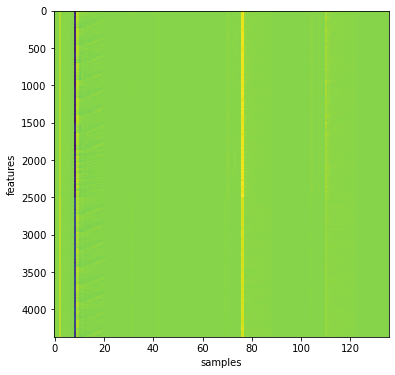

In [38]:
plt.figure(figsize=(6, 6))
plt.imshow(features,interpolation='none')
plt.xlabel('samples')
plt.ylabel('features')
plt.axis('auto')

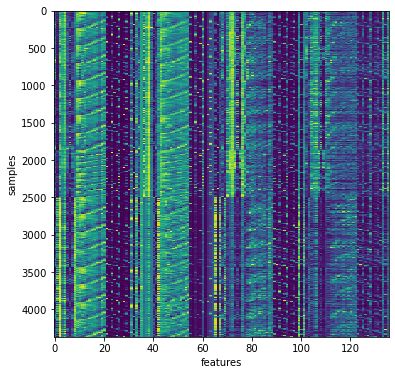

In [55]:
features_norm = scale.minmax_scale(features)

plt.figure(figsize=(6, 6))
plt.imshow(features_norm,interpolation='none')
plt.xlabel('features')
plt.ylabel('samples')
plt.axis('auto')
plt.show()

## Feature selection

#### Variance thresholding

In [52]:
sel = VarianceThreshold(threshold=0.035)
features_reduct = sel.fit_transform(features_norm)
features_reduct.shape

(4368, 27)

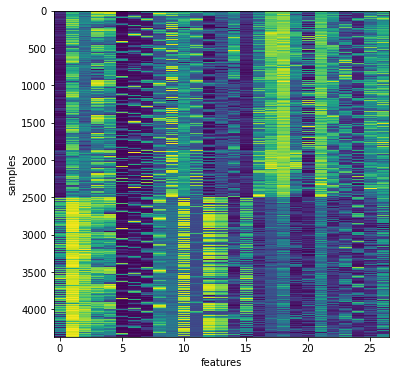

In [54]:
plt.figure(figsize=(6, 6))
plt.imshow(features_reduct,interpolation='none')
plt.xlabel('features')
plt.ylabel('samples')
plt.axis('auto')
plt.show()

# Split Set

In [56]:
# X_train,X_test,y_train,y_test = train_test_split(features_norm, fileLable, test_size = 0.2) # custom selected
# X_train,X_test,y_train,y_test = train_test_split(features_alt, fileLable, test_size = 0.2) # complete
X_train,X_test,y_train,y_test = train_test_split(features_reduct, fileLable, test_size = 0.2) # variance selected

#X_train_SpectralFt,X_test_SpectralFt,y_train_SpectralFt,y_test_SpectralFt = train_test_split(spectral_feat_normalized, fileLable, test_size = 0.2)

In [57]:
print(X_train.shape, X_test.shape)
#print(X_train_SpectralFt, X_test_SpectralFt)

(3494, 27) (874, 27)


In [ ]:
##GMM
#gmm_0 = 

# SVM: multiclass case

## Define and train a model

In [58]:
SVM_parameters={
    'C': 2,
    'kernel': 'rbf',
}

ss = sklearn.svm.SVC(**SVM_parameters, probability=True)
ss.fit(X_train, y_train)
accuracy = ss.score(X_test, y_test)
print("The accuracy is",format(accuracy))

The accuracy is 0.9416475972540046


## Evaluate and Output the Confusion Matrix

Confusion matrix
[[363  10   0]
 [ 41  93   0]
 [  0   0 367]]
Normalized confusion matrix
[[0.97319035 0.02680965 0.        ]
 [0.30597015 0.69402985 0.        ]
 [0.         0.         1.        ]]


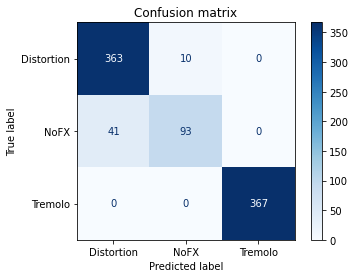

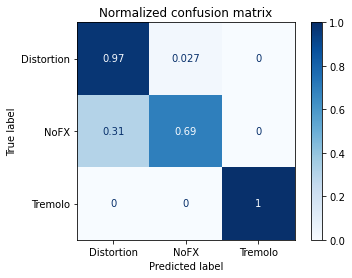

In [59]:
titles_options = [("Confusion matrix", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(ss, X_test, y_test,
                                 display_labels=classes,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()